In [77]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [42]:
btc = pd.read_csv('./Cryptocurrencies/BTC.csv', index_col='Date', parse_dates=True)
btc = btc[['Open', 'High', 'Low', 'Close']]

eth = pd.read_csv('./Cryptocurrencies/ETH.csv', index_col='Date', parse_dates=True)
eth = eth[['Open', 'High', 'Low', 'Close']]

doge = pd.read_csv('./Cryptocurrencies/DOGE.csv', index_col='Date', parse_dates=True)
doge = doge[['Open', 'High', 'Low', 'Close']]

In [43]:
# BTC
btc_differenced_data = np.log(btc).diff().dropna()

# ETH
eth_differenced_data = np.log(eth).diff().dropna()

# DOGE
doge_differenced_data = np.log(doge).diff().dropna()

In [44]:
# Scale the data
scaler = StandardScaler()

btc_differenced_scaled_data = pd.DataFrame(scaler.fit_transform(
    btc_differenced_data), index=btc_differenced_data.index, columns=btc_differenced_data.columns)

eth_differenced_scaled_data = pd.DataFrame(scaler.fit_transform(
    eth_differenced_data), index=eth_differenced_data.index, columns=eth_differenced_data.columns)

doge_differenced_scaled_data = pd.DataFrame(scaler.fit_transform(
    doge_differenced_data), index=doge_differenced_data.index, columns=doge_differenced_data.columns)

In [45]:
# Tỉ lệ pha train, test
train_ratio = 0.8
test_ratio = 1.0 - train_ratio

In [46]:
# Split the data into training, testing, and validation sets
# BTC
train_size = int(train_ratio * len(btc))
btc_train_data, btc_test_data = btc_differenced_scaled_data[:train_size], btc_differenced_scaled_data[train_size:]

# ETH
train_size = int(train_ratio * len(eth))
eth_train_data, eth_test_data = eth_differenced_scaled_data[:train_size], eth_differenced_scaled_data[train_size:]

# DOGE
train_size = int(train_ratio * len(doge))
doge_train_data, doge_test_data = doge_differenced_scaled_data[:train_size], doge_differenced_scaled_data[train_size:]

In [47]:
# make a VAR model
btc_model = VAR(btc_train_data)
eth_model = VAR(eth_train_data)
doge_model = VAR(doge_train_data)

c:\Users\tue05\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\tue05\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\tue05\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [8]:
# BTC
b = btc_model.select_order(maxlags=20)
b.summary()

,AIC,BIC,FPE,HQIC
0,-1.453,-1.439,0.2339,-1.448
1,-7.340,-7.272,0.0006489,-7.315
2,-7.805,-7.683,0.0004076,-7.760
3,-8.113,-7.935,0.0002998,-8.047
4,-8.208,-7.976,0.0002725,-8.122
5,-8.286,-8.000,0.0002521,-8.179
6,-8.364,-8.023*,0.0002332,-8.237
7,-8.409,-8.014,0.0002229,-8.262
8,-8.431,-7.981,0.0002181,-8.264
9,-8.447,-7.944,0.0002145,-8.260


In [48]:
# BTC
btc_model_fitted = btc_model.fit(maxlags=20, ic='aic')
btc_model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 20, Jun, 2024
Time:                     16:42:29
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -7.75020
Nobs:                     1581.00    HQIC:                  -8.23650
Log likelihood:          -2007.13    FPE:                0.000198664
AIC:                     -8.52402    Det(Omega_mle):     0.000172421
--------------------------------------------------------------------
Results for equation Open
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.002455         0.001312           -1.872           0.061
L1.Open          -0.915568         0.025790          -35.502           0.000
L1.High          -0.000104         0.002896           -0.036           0.971


In [49]:
# ETH
eth_model_fitted = eth_model.fit(maxlags=20, ic='aic')
eth_model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 20, Jun, 2024
Time:                     16:42:32
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -7.51255
Nobs:                     1575.00    HQIC:                  -8.20567
Log likelihood:          -1830.54    FPE:                0.000181324
AIC:                     -8.61559    Det(Omega_mle):     0.000148366
--------------------------------------------------------------------
Results for equation Open
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.000989         0.001539           -0.643           0.521
L1.Open          -0.882680         0.026139          -33.769           0.000
L1.High          -0.004427         0.004323           -1.024           0.306


In [50]:
# DOGE
doge_model_fitted = doge_model.fit(maxlags=20, ic='aic')
doge_model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 20, Jun, 2024
Time:                     16:42:35
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -7.56795
Nobs:                     1580.00    HQIC:                  -8.08864
Log likelihood:          -2090.46    FPE:                0.000225690
AIC:                     -8.39650    Det(Omega_mle):     0.000193958
--------------------------------------------------------------------
Results for equation Open
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.003431         0.001468           -2.337           0.019
L1.Open          -0.922619         0.025746          -35.835           0.000
L1.High          -0.008001         0.003312           -2.416           0.016


In [51]:
# Log data
btc_log_data = np.log(btc)
eth_log_data = np.log(eth)
doge_log_data = np.log(doge)

In [52]:
# Cryptocurrency list
cryptos = ['btc', 'eth', 'doge']

In [74]:
# Forecast
for cr in cryptos:
    t_train_data = eval(f'{cr}_train_data')
    t_test_data = eval(f'{cr}_test_data')
    t_temp_log_data = eval(f'{cr}_log_data')
    t_model = eval(f'{cr}_model_fitted')

    t_forecast_steps = len(t_test_data)
    t_lag_order = t_model.k_ar
    t_forecast_input = t_train_data.values[-t_lag_order:]
    t_forecast_diff_scaled = t_model.forecast(
        y=t_forecast_input, steps=t_forecast_steps)

    # Inverse scale the forecast
    t_forecast_diff = pd.DataFrame(scaler.inverse_transform(
        t_forecast_diff_scaled), index=t_test_data.index, columns=t_test_data.columns)

    # Get the last value from the original log-transformed data
    t_last_log_value = t_temp_log_data.iloc[train_size + t_lag_order - 1]

    # Accumulate differenced values to get log-transformed forecast
    t_log_forecast = t_forecast_diff.cumsum() + t_last_log_value

    # Exponentiate to get the forecast back to the original scale
    globals()[f'{cr}_test_forecast'] = np.exp(t_log_forecast)

In [56]:
# Forecast steps
forecast_steps_list = [90, 60, 30]
forecasts = {}

In [63]:
for cr in cryptos:
    train_data = eval(f'{cr}_train_data')
    test_data = eval(f'{cr}_test_data')
    temp_log_data = eval(f'{cr}_log_data')
    model = eval(f'{cr}_model_fitted')
    
    lag_order = model.k_ar
    last_log_value = temp_log_data.iloc[train_size + lag_order - 1]
    
    for forecast_steps in forecast_steps_list:
        # Forecast
        forecast_input = train_data.values[-lag_order:]
        forecast_diff_scaled = model.forecast(y=forecast_input, steps=forecast_steps)

        # Inverse scale the forecast
        forecast_diff = pd.DataFrame(scaler.inverse_transform(forecast_diff_scaled), 
                                    index=pd.date_range(start=temp_log_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B'),
                                    columns=test_data.columns)

        # Accumulate differenced values to get log-transformed forecast
        log_forecast = forecast_diff.cumsum() + last_log_value

        # Exponentiate to get the forecast back to the original scale
        forecast = np.exp(log_forecast)
        forecasts[cr, forecast_steps] = forecast

In [64]:
forecasts[('btc', 90)]['Close']

2024-06-18    28009.688252
2024-06-19    28249.809542
2024-06-20    28304.384312
2024-06-21    28572.801461
2024-06-24    28513.198660
                  ...     
2024-10-15    31536.917019
2024-10-16    31581.926506
2024-10-17    31627.003349
2024-10-18    31672.144103
2024-10-21    31717.347588
Freq: B, Name: Close, Length: 90, dtype: float64

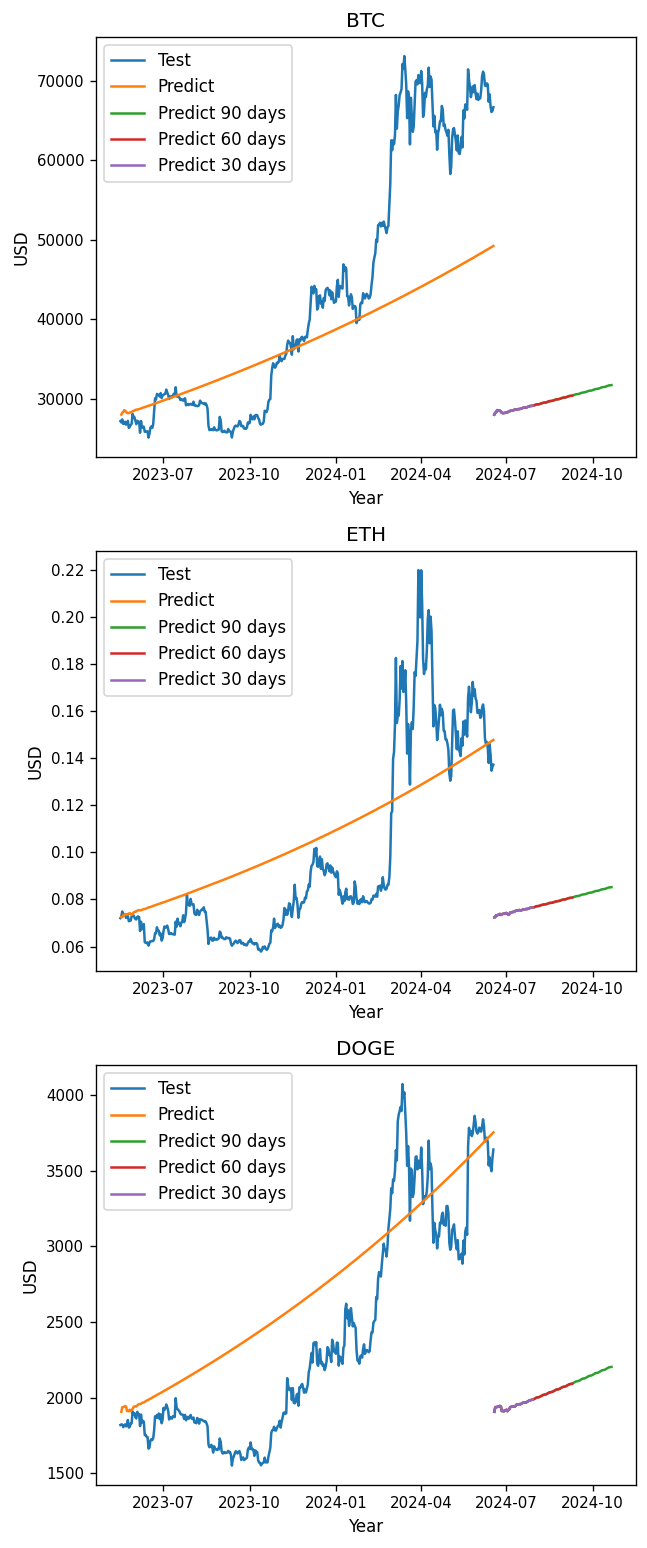

In [80]:
# Plot the results
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(5.5, 13))

for i, cr in enumerate(cryptos):
    ax = axes[i]
    ax.plot(eval(cr)[train_size:]['Close'], label='Test')
    ax.plot(eval(f'{cr}_test_forecast')['Close'], label='Predict')
    # ax.axvline(x=btc_train_data.index[-1], color='black', linestyle='--')
    ax.plot(forecasts[(cr, 90)]['Close'], label='Predict 90 days')
    ax.plot(forecasts[(cr, 60)]['Close'], label='Predict 60 days')
    ax.plot(forecasts[(cr, 30)]['Close'], label='Predict 30 days')
    ax.set_xlabel('Year')
    ax.set_ylabel('USD')
    ax.set_title(cr.upper())
    ax.tick_params(labelsize=9)
    ax.legend()

    # Format x-axis to show only the year
    ax.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=8))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()
plt.show()

In [78]:
# 6. Đánh giá độ chính xác test bằng MAPE, MASE và RMSE
# mase = np.mean([abs(y_test - y_pred) / (abs(Actual[i] - Actual[i - 1]) / len(Actual) - 1) for i in range(1, len(Actual))])
# mape = np.mean(np.abs(btc_y_pred - btc_y_test)/np.abs(btc_y_test))

def mean_absolute_scaled_error(y_test, y_pred):
    # Calculate the mean absolute error of the predictions
    mae_pred = np.mean(np.abs(y_test - y_pred))
    
    # Calculate the mean absolute error of a naive forecast
    mae_naive = np.mean(np.abs(y_test[1:] - y_test[:-1]))
    
    # Calculate MASE
    mase = mae_pred / mae_naive
    
    return mase


for cr in cryptos:
    test_data = eval(cr)[train_size + 1:]['Close'].values
    pred_data = eval(f'{cr}_test_forecast')['Close'].values

    mase = mean_absolute_scaled_error(test_data, pred_data)
    mape = mean_absolute_percentage_error(test_data, pred_data)
    rmse = root_mean_squared_error(test_data, pred_data)

    print(cr.upper())
    print('MAPE:', mape)
    print('MASE:', mase)
    print('RMSE:', rmse, '\n')

BTC
MAPE: 0.16752120639001616
MASE: 10.911821698671748
RMSE: 11898.846081163256 

ETH
MAPE: 0.2598480539564412
MASE: 7.02534308847433
RMSE: 0.027458741531749008 

DOGE
MAPE: 0.19907485128029032
MASE: 8.966022068574693
RMSE: 477.48116080269546 

